In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

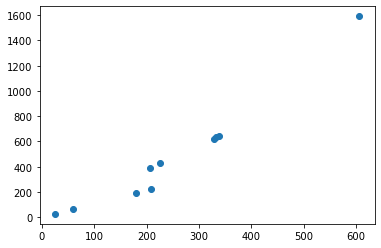

In [53]:
x_data = [338.0, 333.0, 328.0, 207.0, 226.0, 25.0, 179.0, 60.0, 208.0, 606.0]
y_data = [640.0, 633.0, 619.0, 393.0, 428.0, 27.0, 193.0, 66.0, 226.0, 1591.0]
# y = b + w * x

plt.plot(x_data, y_data, 'o')

In [54]:
x = np.arange(-200, -100, 1) # bias
y = np.arange(-5, 5, 0.1) # weight
Z = np.zeros((len(x), len(y))) # Loss func for each pair(w, b)
X, Y = np.meshgrid(x, y)
for i in range(len(x)):
    for j in range(len(y)):
        b = x[i]
        w = y[j]
        
        # reset z[j][i]; Notice plt.contourf(x,y,z) => z 為等高線的值
        # 實際畫出來的效果
        # z[2][0] z[2][1] z[2][2]
        # z[1][0] z[1][1] z[1][2]
        # z[0][0] z[0][1] z[0][2]
        # Transpose it!
        Z[j][i] = 0
        for n in range(len(x_data)):
            Z[j][i] = Z[j][i] + (y_data[n] - b - w * x_data[n])**2
        Z[j][i] = Z[j][i] / len(x_data)

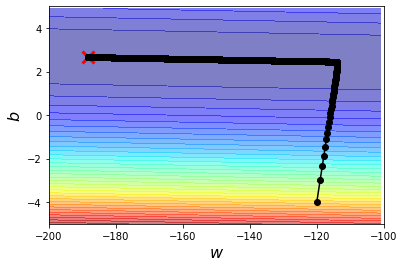

In [113]:
b = -120 # init
w = -4 # init
lr = 1 # learning rate
iteration = 100000

# recordiing each step
b_history = [b]
w_history = [w]
loss_history = []

lr_w_history = []
lr_b_history = []

# !!! 客製化 learning rate
lr_w = 0
lr_b = 0

# iter
for i in range(iteration):
    
    # reset grad
    b_gd = 0.0
    w_gd = 0.0
    
    # get gradient via sum over x_data 
    for n in range(len(x_data)):
        w_gd = w_gd + 2.0 * (y_data[n] - b - w * x_data[n]) * (-x_data[n])
        b_gd = b_gd + 2.0 * (y_data[n] - b - w * x_data[n]) * (-1.0)

    # update lr by self => adagrad!!!
    lr_w = lr_w + (w_gd)**2
    lr_b = lr_b + (b_gd)**2
    lr_w_history.append(1/np.sqrt(lr_w))
    lr_b_history.append(1/np.sqrt(lr_b))
    
    
    #print(w_gd, b_gd)
        
    # Update params
    w = w - lr/np.sqrt(lr_w) * w_gd
    b = b - lr/np.sqrt(lr_b) * b_gd
    
    # store params
    w_history.append(w)
    b_history.append(b)
    
    loss = 0
    for n in range(len(x_data)):
        loss = loss + (y_data[n] - b - w * x_data[n])**2
        
    loss = loss/len(x_data)
    loss_history.append(loss)
    
    if (np.sqrt(loss) < 100):
        break

#plot
plt.contourf(x,y,L, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot(-188.4, 2.67, 'x', ms=12, markeredgewidth=3, color='red')
plt.plot(b_history, w_history, 'o-', color='black')
plt.xlim(-200, -100)
plt.ylim(-5, 5)
plt.ylabel(r'$b$', fontsize=16)
plt.xlabel(r'$w$', fontsize=16)
plt.show()

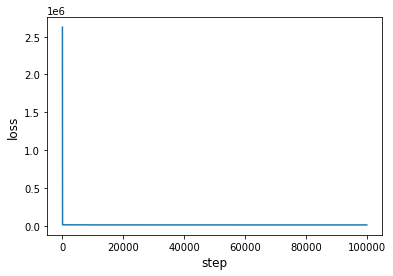

In [109]:
plt.plot(np.arange(len(loss_history)), loss_history, '-')
plt.xlabel('step', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()

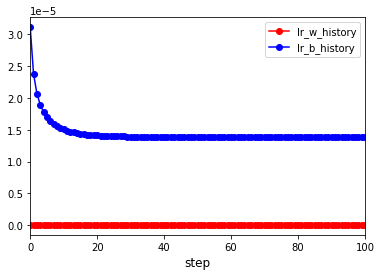

In [126]:
plt.plot(np.arange(len(lr_w_history)), lr_w_history, 'o-', color='red', label='lr_w_history')
plt.plot(np.arange(len(lr_b_history)), lr_b_history, 'o-', color='blue', label='lr_b_history')
plt.xlabel('step', fontsize=12)
plt.xlim(0, 100)
plt.legend()
plt.show()

# 
b 很快就接近ans (-4 -> 1.5)

w (-120 -> -186) 所以一開始的lr 很大

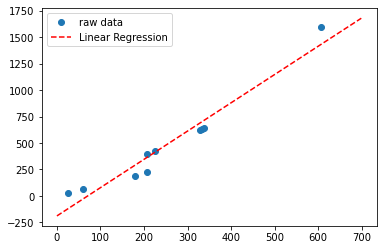

In [111]:
w = w_history[-1]
b = b_history[-1]
x_range = np.arange(0,700,1)
y_predict = b + w * x_range
plt.plot(x_data, y_data, 'o', label='raw data')
plt.plot(x_range, y_predict, '--', color='red', label='Linear Regression')
plt.legend()
plt.show()

# Test contourf

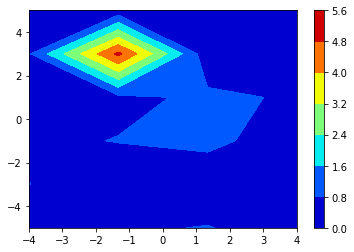

In [46]:
x = np.linspace(-4, 4, 4)
 
# numpy.linspace creates an array of
# 9 linearly placed elements between
# -4 and 4, both inclusive
y = np.linspace(-5, 5, 6)
 
# The meshgrid function returns
# two 2-dimensional arrays
x_1, y_1 = np.meshgrid(x, y)

random_data = np.random.random((len(y), len(x)))
random_data[4][1]=5
plt.contourf(x, y, random_data, cmap = 'jet')
 
plt.colorbar()
plt.show()

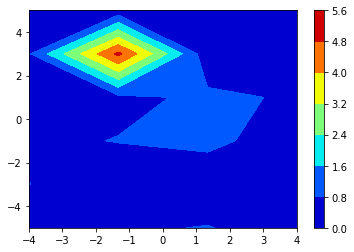

In [47]:
plt.contourf(x_1, y_1, random_data, cmap = 'jet')
 
plt.colorbar()
plt.show()

In [48]:
random_data

array([[0.31232057, 0.69366735, 0.83328416, 0.40030465],
       [0.81397833, 0.21539141, 0.24863066, 0.09517754],
       [0.62848992, 0.82866524, 0.99356978, 0.37653578],
       [0.49188406, 0.59032681, 0.95870109, 0.70645334],
       [0.72427267, 5.        , 0.26017733, 0.2299973 ],
       [0.04622179, 0.29549428, 0.57546965, 0.03454546]])